# Classifying Iris data Using Tensorflow
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
sns.set(font_scale =1.5)
plt.style.use('fivethirtyeight')

In [2]:
# Importing the data from local disk
data=pd.read_csv('./data/iris/iris.csv', names=['sepal length','sepal width','petal length','petal width'])
target=pd.read_csv('./data/iris/target.csv', names=['target']).astype(int)

In [3]:
data.shape

(150, 4)

In [4]:
target.shape

(150, 1)

In [5]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#treating Inputs adding bias to the data 
# all inputs and outputs need to be in numpy array format
L,W=data.shape
X=np.ones((L,W+ 1))
X[:, 1:] = data.values
X[0:5,:]
X_raw=X

In [7]:
#treating the target variables
# all inputs and outputs need to be in numpy array format
enc = OneHotEncoder(handle_unknown='ignore')
Y=enc.fit_transform(target).toarray()
Y[0:5,:]
Y_raw=Y

In [8]:
train_x, test_x, train_y, test_y =train_test_split(X, Y, test_size=0.33, random_state=40)

### Functions:

In [9]:
# Weights are chosen from random normal distribution
def initialize_weights(shape, stddev):
    weights = tf.random_normal(shape, stddev=stddev)
    return tf.Variable(weights)

In [10]:
# Forward propagation in our network
#  this network only has ONE hidden layer hence we have 2 set of weights:
# input weights
# output weights
def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

In [11]:
# building a feed forward neural network with 128 hidden layers:
h_size=128
# standard deviation for weights 0.1:
stddev=0.1

# 1) define layer sizes
x_size = train_x.shape[1]  
y_size = train_y.shape[1]

# 2) define variables
X = tf.placeholder("float", shape=[None, x_size])
y = tf.placeholder("float", shape=[None, y_size])

# 3) initate weights
weights_1 = initialize_weights((x_size, h_size), stddev)
weights_2 = initialize_weights((h_size, y_size), stddev)

In [12]:
# sgd step: step length toward converging
sgd_step=0.01
# now we will forward propagate once to initate learning
y_pred = forward_propagation(X, weights_1, weights_2)
# fuind which class has highest probability
predict = tf.argmax(y_pred, dimension=1)
# define the cost function (cross entropy between actual label and predicted label)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
# train using stochastic gradient descent 
updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
# opening a new tensrflow session
sess = tf.Session()
# Add ops to save and restore all the variables.
saver = tf.train.Saver()
# initating all variables
init = tf.initialize_all_variables()
# 50 epocs 
steps = 50
sess.run(init)
# epocs for visualizng
x  = np.arange(steps)
test_acc = []
train_acc = []
print("Step, train accuracy, test accuracy")
# looping through each epoc    
for step in range(steps):
    for i in range(len(train_x)):
        #feeding each training sample one by one
        sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})
    train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(predict, feed_dict={X: train_x, y: train_y}))
    test_accuracy = np.mean(np.argmax(test_y, axis=1) ==sess.run(predict, feed_dict={X: test_x, y: test_y}))
    print("%d, %.2f%%, %.2f%%"% (step + 1, 100. * train_accuracy, 100. * test_accuracy))
    test_acc.append(100. * test_accuracy)
    train_acc.append(100. * train_accuracy)
t =pd.DataFrame(index=np.arange(steps),columns=['Test Accuracy', 'Train Accuracy']) 
t['Test Accuracy']=np.array(test_acc)
t[ 'Train Accuracy']=np.array(train_acc)
title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) + \
        ", std dev:" + str(stddev)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step, train accuracy, test accuracy
1, 35.00%, 30.00%
2, 62.00%, 62.00%
3, 67.00%, 66.00%
4, 67.00%, 66.00%
5, 67.00%, 66.00%
6, 67.00%, 66.00%
7, 67.00%, 66.00%
8, 67.00%, 66.00%
9, 67.00%, 66.00%
10, 67.00%, 66.00%
11, 67.00%, 66.00%
12, 67.00%, 66.00%
13, 67.00%, 66.00%
14, 67.00%, 68.00%
15, 67.00%, 68.00%
16, 68.00%, 70.00%
17, 68.00%, 72.00%
18, 69.00%, 72.00%
19, 72.00%, 72.00%
20, 75.00%, 72.00%
21, 75.00%, 74.00%
22, 76.00%, 78.00%
23, 79.00%, 82.00%
24, 79.00%, 82.00%
25, 79.00%, 84.00%
26, 81.00%, 86.00%
27, 81.00%, 86.00%
28, 84.00%, 86.00%
29, 84.00%, 86.00%
30, 84.00%, 90.00%
31, 85.00%, 90.00%
32, 87.00%, 92.00%
33, 88.00%, 92.00%
34, 90.00%, 92.00%
35, 90.00%, 92.00%
36, 90.00%, 92.00%
37, 91.00%, 92.00%
38, 92.00%, 92.00%
39, 92.00%, 92.00%
40, 92.00%, 92.00%
41, 93.00%, 92.00%
42, 94.00%, 92.00%
43, 94.00%, 92.00%
44, 94.00%, 92.00%
45, 95.00%, 92.00%
46, 95.00%, 92.00%
47, 95.00%, 92.00%
48, 96

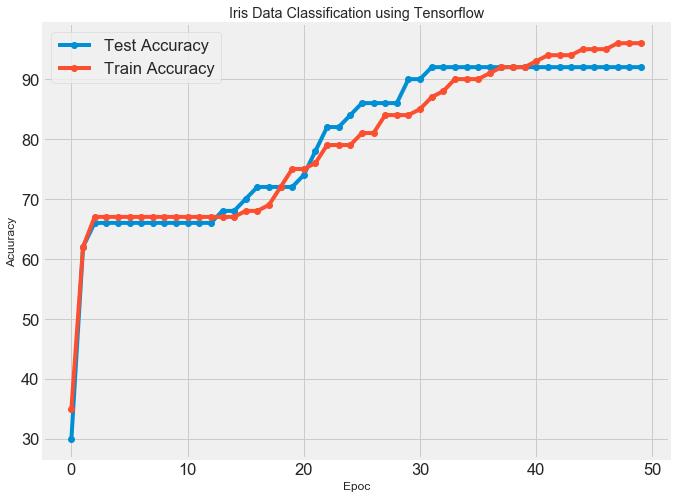

In [14]:
plt.figure(figsize=(10,8))
plt.plot(t,'-o');
plt.legend(t.columns);
plt.xlabel('Epoc');
plt.ylabel('Acuuracy');
plt.title('Iris Data Classification using Tensorflow');

### Confusion matrix:

In [15]:
iris_data=data.merge(target,left_index=True, right_index=True)
target_classes={0:'Setosa',1:'Versicolour',2:'Virginica'}
iris_data=iris_data.replace({"target": target_classes})

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')


    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    ax.grid(False)
    return ax

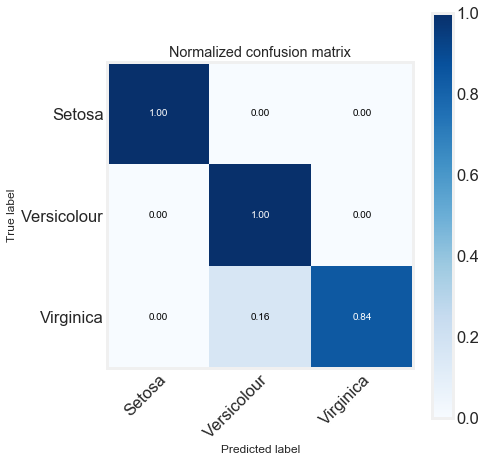

In [17]:
y_pred=pd.DataFrame(sess.run(predict, feed_dict={X: X_raw, y: Y_raw}),columns=['Preds'])
plot_confusion_matrix(target,y_pred,classes=pd.unique(iris_data['target'].values), normalize=True,
                      title='Normalized confusion matrix');

In [18]:
print(classification_report(target, y_pred.values, target_names=pd.unique(iris_data['target'].values)))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
 Versicolour       0.86      1.00      0.93        50
   Virginica       1.00      0.84      0.91        50

   micro avg       0.95      0.95      0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



### Saving Model to Disk

In [19]:
# Save the variables to disk.
save_path = saver.save(sess, "./data/iris/model.ckpt")

### Restor Model from Disk

In [20]:
Restor=False

if Restor:

    tf.reset_default_graph()
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    # Later, launch the model, use the saver to restore variables from disk, and
    # opening a new tensrflow session
    sess = tf.Session()
    # Restore variables from disk.
    saver.restore(sess, "./data/iris/model.ckpt")

### Training vs SGD Steps

In [21]:
def train_ff(sgd_step):
    tf.reset_default_graph();
    x_size = train_x.shape[1]  
    y_size = train_y.shape[1]
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)
    y_pred = forward_propagation(X, weights_1, weights_2)
    predict = tf.argmax(y_pred, dimension=1)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred)) 
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    # opening a new tensrflow session
    sess = tf.Session()
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    # initating all variables
    init = tf.initialize_all_variables()
    # 50 epocs 
    steps = 50
    sess.run(init)
    # epocs for visualizng
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    for step in range(steps):
        for i in range(len(train_x)):
            #feeding each training sample one by one
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})
        train_accuracy = np.mean(np.argmax(train_y, axis=1) == sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==sess.run(predict, feed_dict={X: test_x, y: test_y}))
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)
    return train_acc,test_acc

    

In [22]:
train=pd.DataFrame(index=np.arange(steps),columns=[0.01,0.02,0.03])
for step in [0.01,0.02,0.03]:
    t,tt=train_ff(0.03)
    train[step]=t

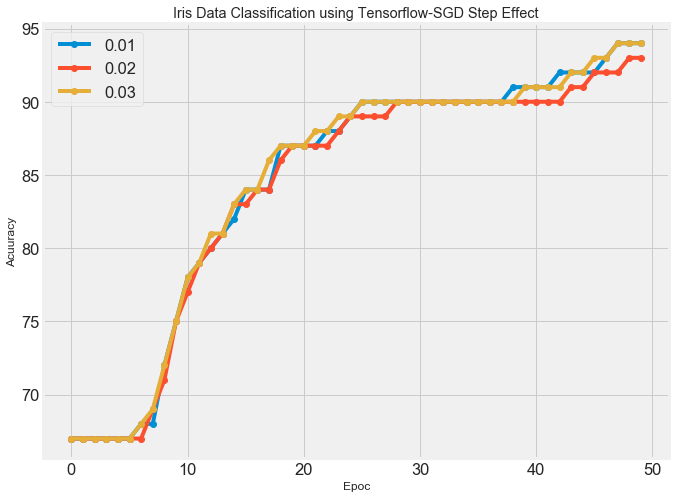

In [23]:
plt.figure(figsize=(10,8))
plt.plot(train,'-o');
plt.legend(train.columns);
plt.xlabel('Epoc');
plt.ylabel('Acuuracy');
plt.title('Iris Data Classification using Tensorflow-SGD Step Effect');